In [1]:
import matplotlib.pyplot as plt
from load_pzflow_catalog import load_pzflow_catalog
from pzflow import FlowEnsemble
from showyourwork.paths import user as Paths
import numpy as np

In [6]:
import jax
# Global flag to set a specific platform, must be used at startup.
jax.config.update('jax_platform_name', 'cpu')


In [2]:
# instantiate the paths
paths = Paths()

# load the flow ensemble
flowEns = FlowEnsemble(file=paths.data / "pz_ensemble/pz_ensemble.pzflow.pkl")

# load the test set
test_set = load_pzflow_catalog(subset="test")

In [3]:
(test_set.shape[0] // 100 + 1) * 12.9 / 60 / 60

6.65425

In [4]:
%%time
grid = np.linspace(0, 3.5, 351)
pdfs = flowEns.posterior(test_set[:100], "redshift", grid, returnEnsemble=True, err_samples=10)
pdfs0 = flowEns.posterior(test_set[:100], "redshift", grid, returnEnsemble=False, err_samples=10)

CPU times: user 9.22 s, sys: 5.93 s, total: 15.1 s
Wall time: 23.3 s


In [5]:
pdfs.shape

(100, 4, 351)

In [6]:
pdfs1 = flowEns.posterior(test_set[:100], "redshift", grid, err_samples=100)

In [33]:
pdfs2 = flowEns.posterior(test_set[:1000], "redshift", grid, err_samples=10)

In [21]:
pdfs1 = pdfs

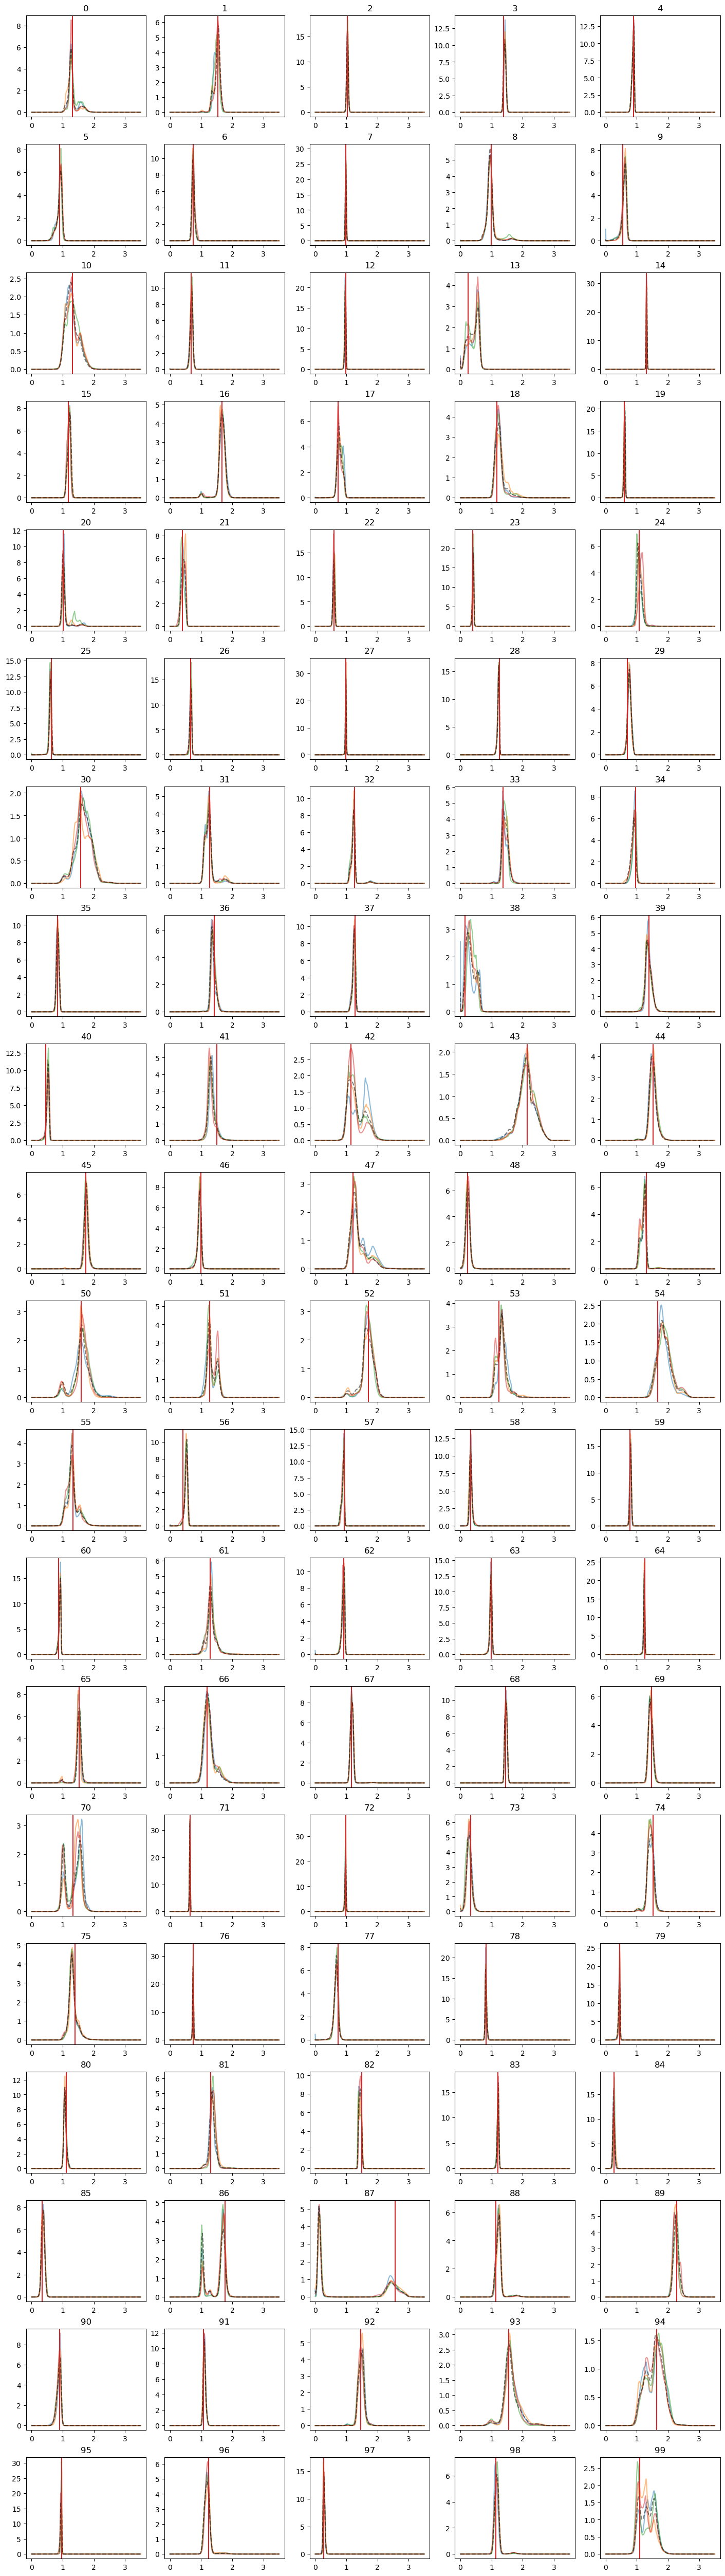

In [7]:
fig, axes = plt.subplots(20, 5, figsize=(14, 50), dpi=100, constrained_layout=True)

for i, ax in enumerate(axes.flatten()):
    pdfEns = pdfs[i]
    for pdf in pdfEns:
        ax.plot(grid, pdf, alpha=0.5)
    ax.plot(grid, pdfs0[i], c="k", ls="--", alpha=0.5)
    ax.axvline(test_set["redshift"].iloc[i], c="C3")
    ax.set(title=i)

In [73]:
idx = [21, 54, 99]
test_set = test_set.iloc[idx]

In [74]:
test_set

,redshift,u,g,r,i,z,y,u_err,g_err,r_err,i_err,z_err,y_err
800022,1.028139,25.253421,25.436432,25.531433,25.320228,25.006097,24.824376,0.101093,0.039061,0.041732,0.051303,0.068481,0.131905
800057,2.584426,24.284087,24.162526,24.170717,24.220783,24.411088,24.411667,0.043189,0.013305,0.013117,0.019593,0.040397,0.092027
800104,1.681369,25.765895,25.637796,25.941090,25.815235,25.622962,25.348708,0.157327,0.046679,0.060033,0.079551,0.117761,0.206213


In [62]:
grid = np.linspace(0, 3.5, 351)
pdf_ens = flowEns.posterior(test_set, "redshift", grid, returnEnsemble=True, err_samples=100, seed=0)
pdf_mean = flowEns.posterior(test_set, "redshift", grid, returnEnsemble=False, err_samples=100, seed=0)

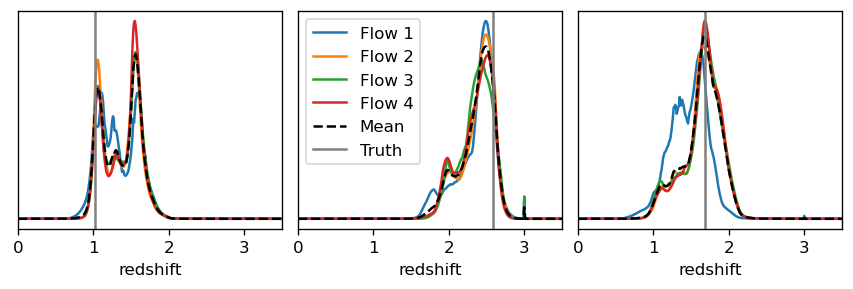

In [81]:
fig, axes = plt.subplots(1, 3, figsize=(7, 2.3), constrained_layout=True, dpi=120)

for i, ax in enumerate(axes):
    for j, pdf in enumerate(pdf_ens[i]):
        ax.plot(grid, pdf, label=f"Flow {j + 1}")
    ax.plot(grid, pdf_mean[i], c="k", ls="--", label="Mean")
    ax.axvline(test_set.iloc[i]["redshift"], label="Truth", c="gray")
    ax.set(yticks=[], xlabel="redshift", xlim=(grid.min(), grid.max()))

axes[1].legend(loc="upper left")

In [82]:
from jax import random

In [91]:
isinstance(random.PRNGKey(0), jnp.ndarray)

True

In [88]:
import jax.numpy as jnp

In [89]:
jnp.ndarray

jax._src.numpy.ndarray.ndarray